# Composing non-linear warps

The idea here is to compose multiple nonlinear warps together into a single warp which is then applied to the image of interest. We want to calculate an overall warping inorder to interpolate the image **only once**.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.data as data

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def rotmatrix(angle):
    """Generate a rotation matrix"""
    return np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

def apply(transform, coords):
    """Apply a matrix transformation to the coordinates"""
    return np.tensordot(transform, coords, axes=1)

In [3]:
img = data.camera()
def plot_coords(coords):
    """show the coordinates and the warped image"""
    fig, ((g00, g01), (g10, g11)) = fig, grid = plt.subplots(2, 2, figsize=(10,10))
    
    # show coordinates
    g00.matshow(coords[0])
    g00.contour(coords[0], colors="k")
    g00.set_title("Y coordinate")
    g01.matshow(coords[1])
    g01.contour(coords[1], colors="k")
    g01.set_title("X coordinate")
    
    # show images
    img2 = ndi.map_coordinates(img, coords)
    g10.matshow(img)
    g10.set_title("Original Image")
    g11.matshow(img2)
    g11.set_title("Warped Image")
    
    for g in grid.ravel():
        g.axis("off")
        
    return img2

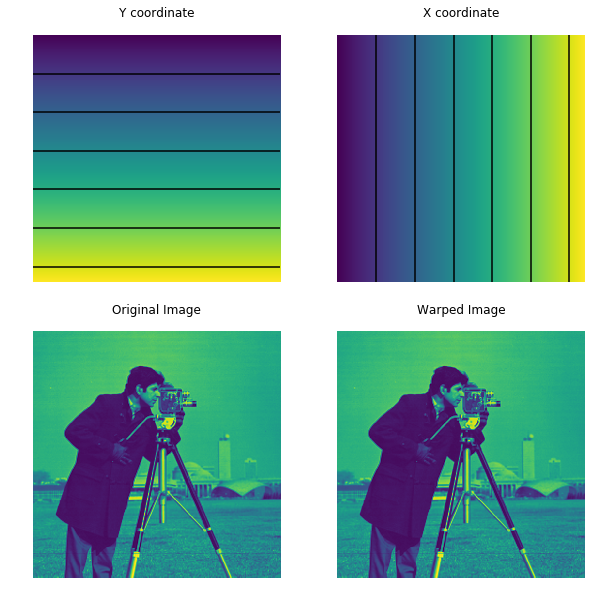

In [4]:
# plot unwarped coordinates
coords = np.indices(img.shape)
plot_coords(coords);

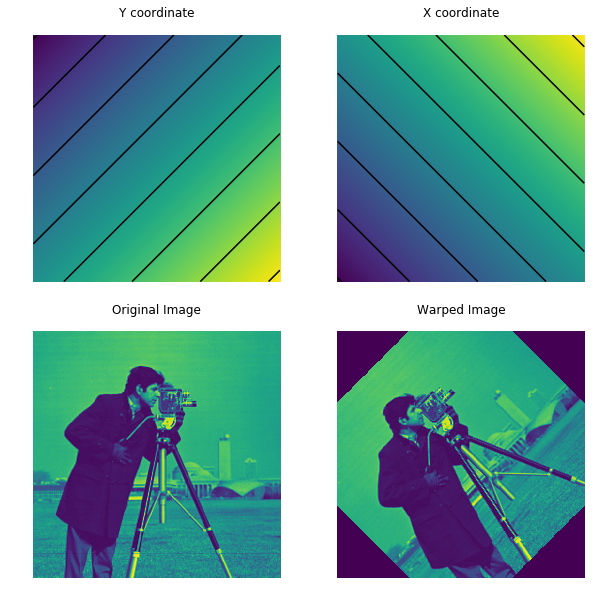

In [5]:
# show rotated coordinates, note that before any transformation is applied you need to center the data first and then
# warp and then move back to the original position
center = np.array((256,256))[:, None, None]
coords2 = apply(rotmatrix(np.pi / 4), coords - center) + center

plot_coords(coords2);

If you _know_ the analytical function for applying the warp then you can apply it now. Remember that the warps are applied in reverse order. So if rotation is the second warp you apply it first.

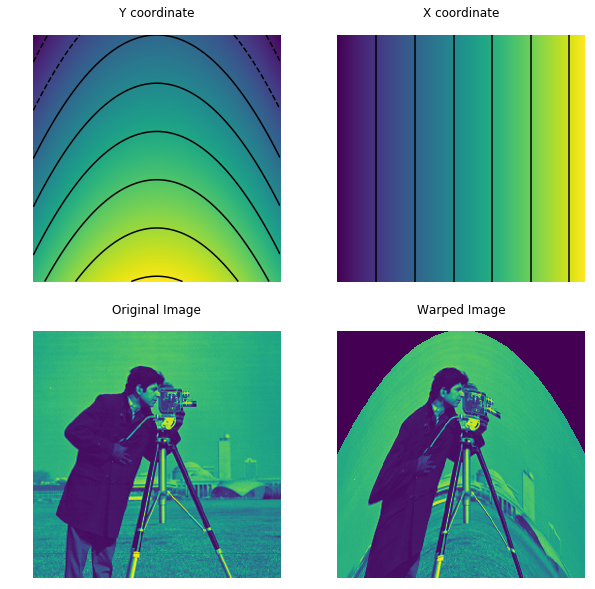

In [7]:
# just the nonlinear warp first
c_coords = coords - center
coords3 = np.array((c_coords[0] - c_coords[1]**2/256, c_coords[1])) + center

plot_coords(coords3);

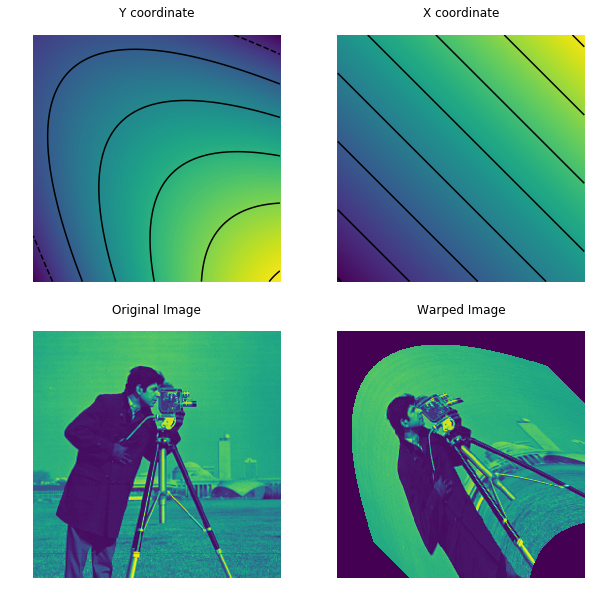

In [8]:
# now apply the warp to the rotated coordinates
c_coords = coords2 - center
coords4 = np.array((c_coords[0] - c_coords[1]**2/256, c_coords[1])) + center

img4 = plot_coords(coords4)

# What about numerical warps

The question is now what to do if we have non-analytical warping. We could turn it into an analytical function using some sort of interpolator, but that is what `map_coordinates` does anyways. So we can use `map_coordinates` to numerically propogate our transformation on our rotated coordinate system

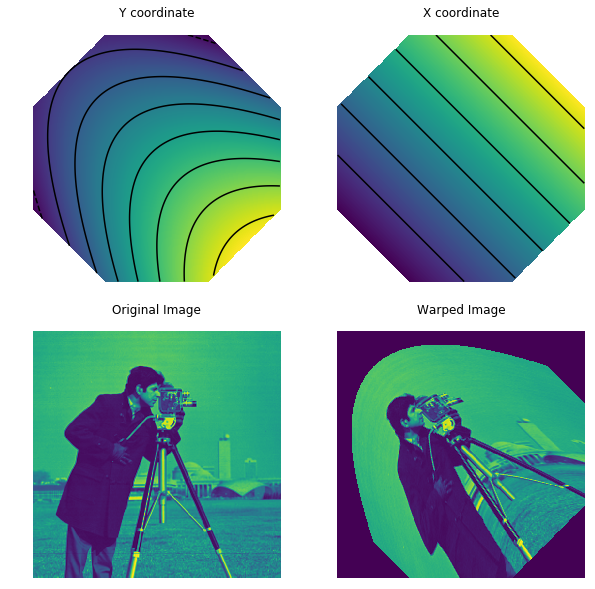

In [9]:
# propogate numerically, i.e. what if we didnt' know the warp was $f(x, y) = x, y - x^2$
coords5 = np.array([ndi.map_coordinates(c, coords2, cval=np.nan) for c in coords3])
img5 = plot_coords(coords5)

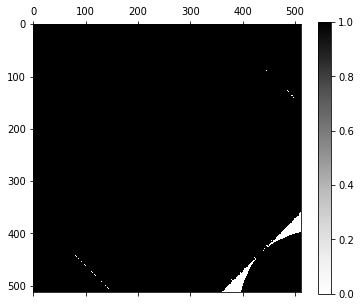

In [14]:
# we can see the difference between the two methods
fig, ax = plt.subplots(figsize=(3*2, 2.5*2))
im = ax.matshow((img5 == img4) * 1, cmap="Greys")
plt.colorbar(im)

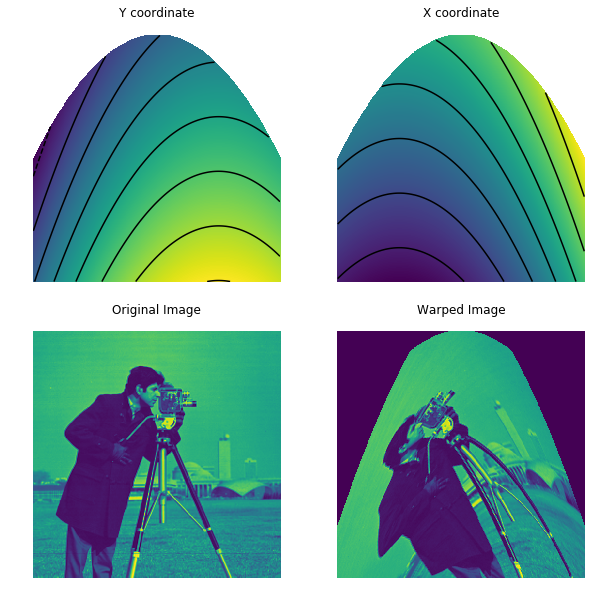

In [15]:
# propogate numerically, i.e. what if we didnt' know the warp was $f(x, y) = x, y - x^2$
coords5 = np.array([ndi.map_coordinates(c, coords3, cval=np.nan) for c in coords2])
img5 = plot_coords(coords5)